In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')

In [2]:
# datetime
# season 1=봄, 2=여름, 3=가을, 4=겨울
# holyday 1=휴일
# workingday 1=주중
# weather 1=맑음, 2=안개, 3=가벼운눈,가벼운비, 4=심한눈/비 천둥/번개
# temp 
# atemp
# humidity
# windspeed
# casual 등록되지 않은사용자가 대여한횟수
# registered 등록된 사용자가 대여한 횟수
# count
train = pd.read_csv('bike.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [4]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
datetime = train['datetime']
datetime.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [9]:
train['year'] = datetime.dt.year
train['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [10]:
train['month'] = datetime.dt.month
train['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [11]:
train['day'] = datetime.dt.day
train['day'].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [12]:
train['hour'] = datetime.dt.hour
train['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [13]:
train['minute'] = datetime.dt.minute
train['minute'].head()

0    0
1    0
2    0
3    0
4    0
Name: minute, dtype: int64

In [14]:
train['second'] = datetime.dt.second
train['second'].head()

0    0
1    0
2    0
3    0
4    0
Name: second, dtype: int64

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


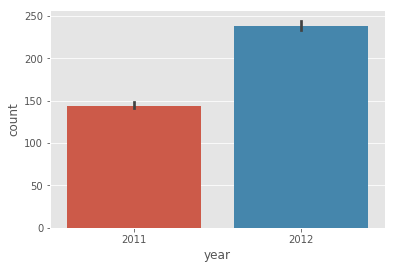

In [16]:
sns.barplot(data=train, x='year', y='count')

In [17]:
train11 = train[train['year']==2011]
train12 = train[train['year']==2012]

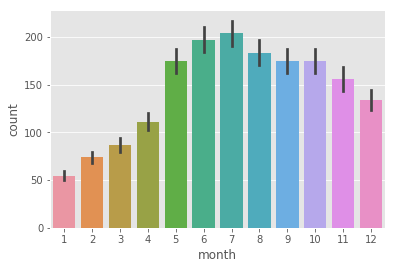

In [18]:
sns.barplot(data=train11, x='month', y='count')

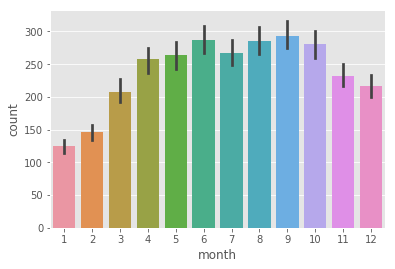

In [19]:
sns.barplot(data=train12, x='month', y='count')

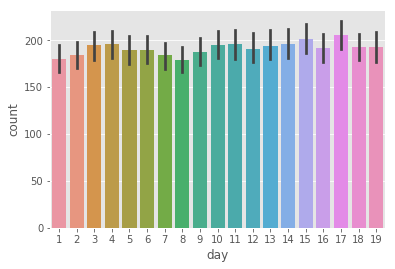

In [20]:
sns.barplot(data=train, x='day', y='count')

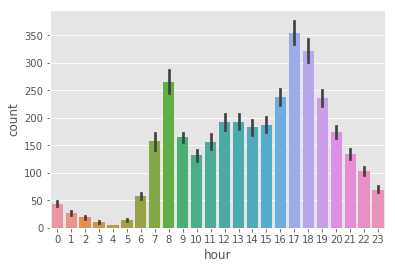

In [21]:
sns.barplot(data=train11, x='hour', y='count')

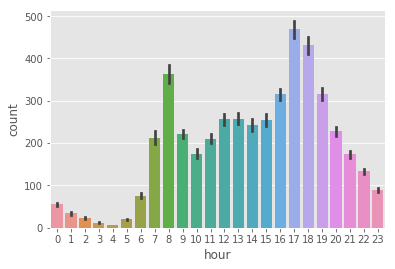

In [22]:
sns.barplot(data=train, x='hour', y='count')

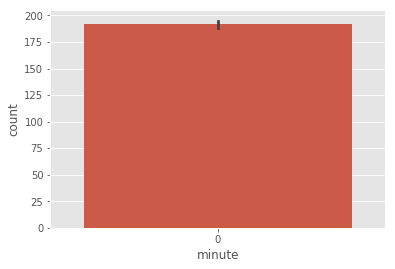

In [23]:
sns.barplot(data=train, x='minute', y='count')

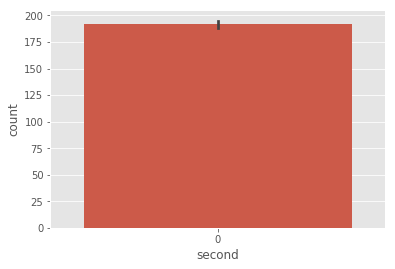

In [24]:
sns.barplot(data=train, x='second', y='count')

In [25]:
train['dayofweek'] = datetime.dt.dayofweek
train['dayofweek'].head()

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

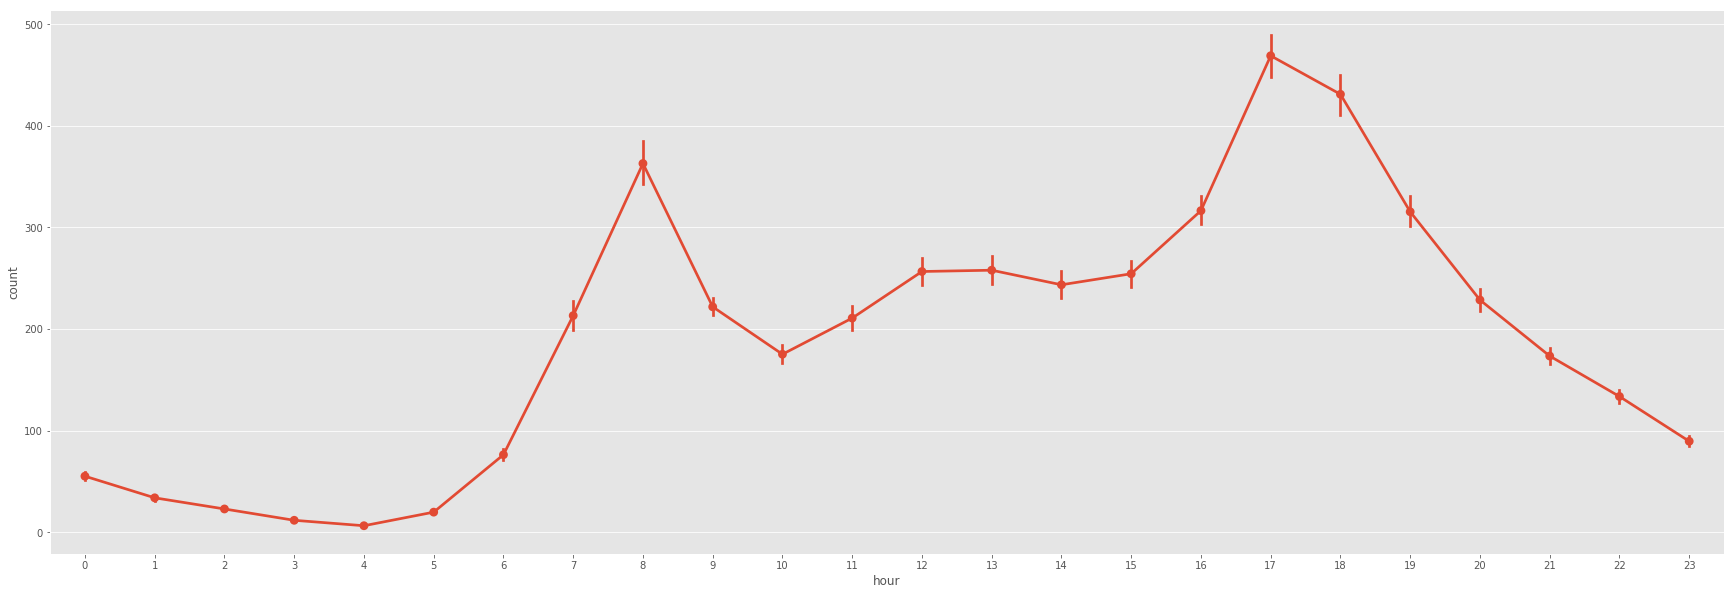

In [26]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='hour', y='count')

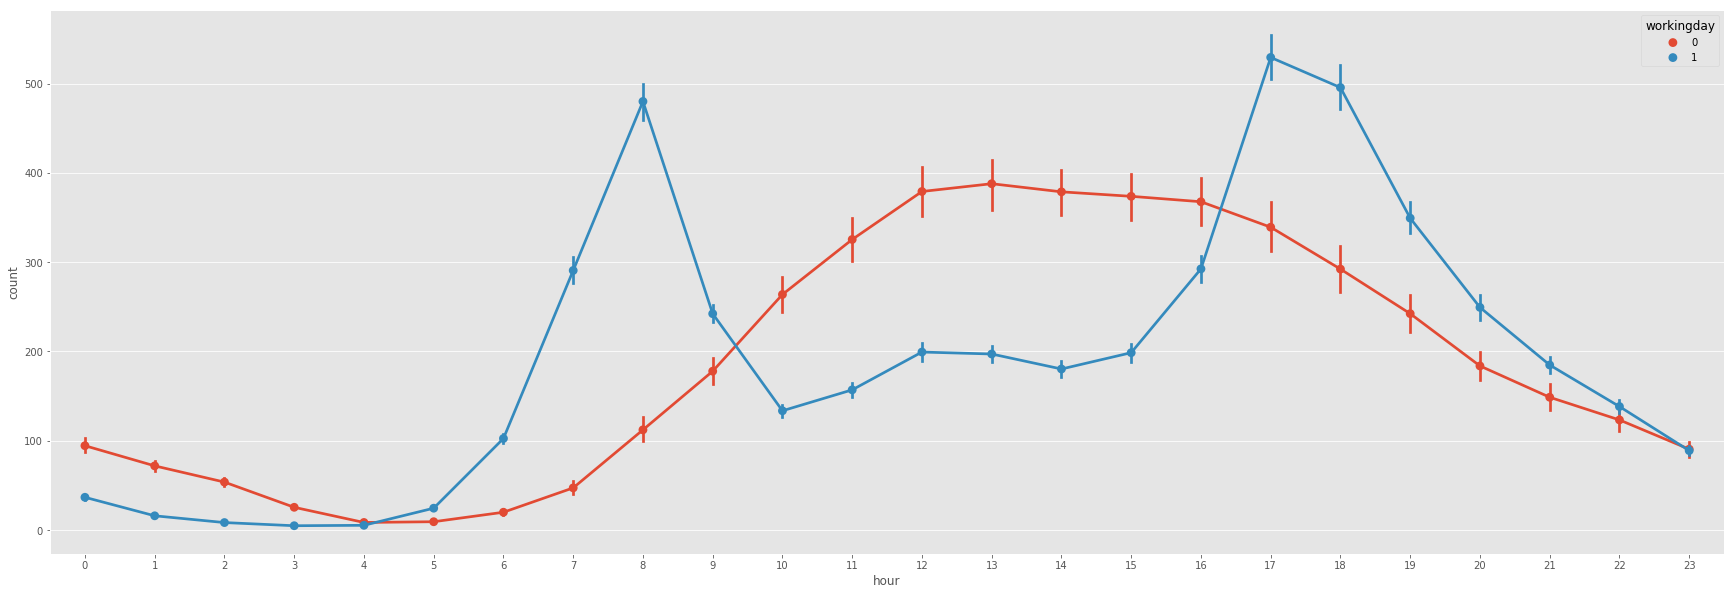

In [27]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='hour', y='count', hue='workingday')

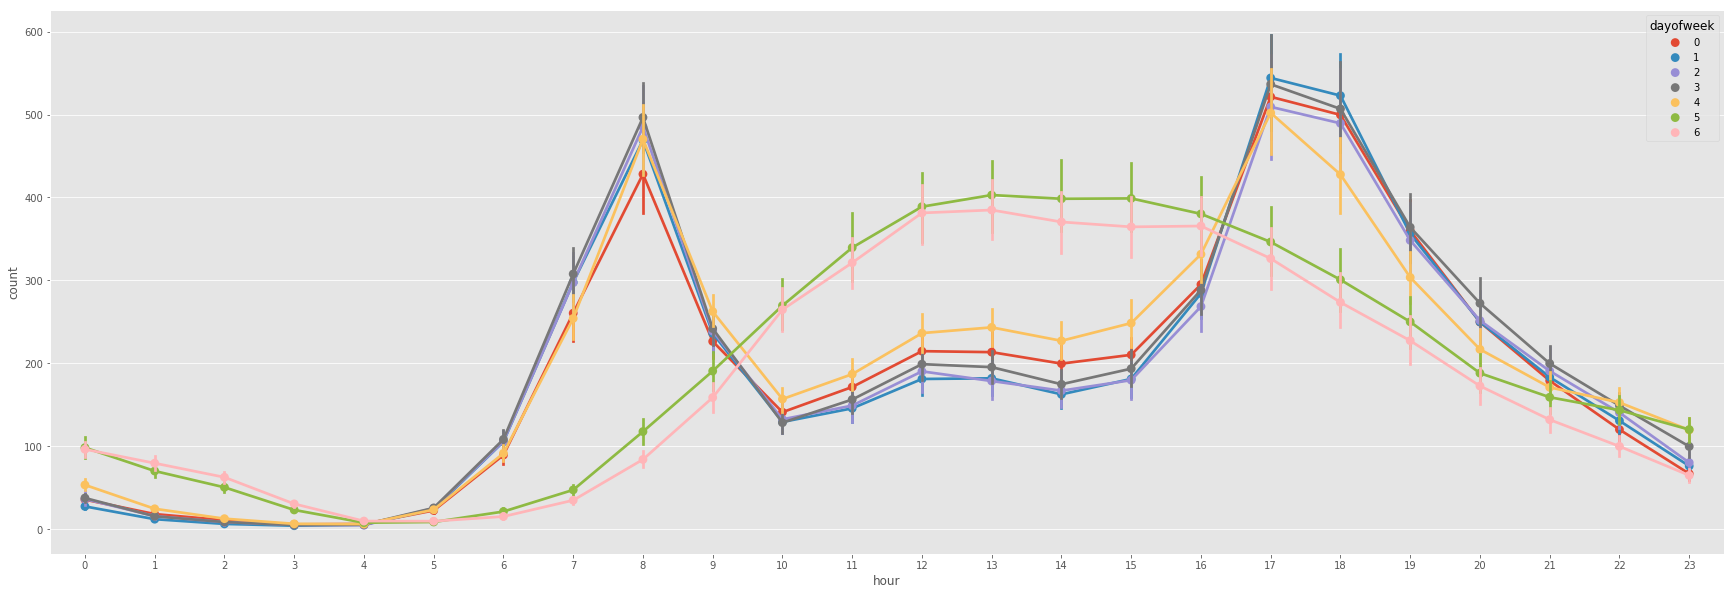

In [28]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='hour', y='count', hue='dayofweek')

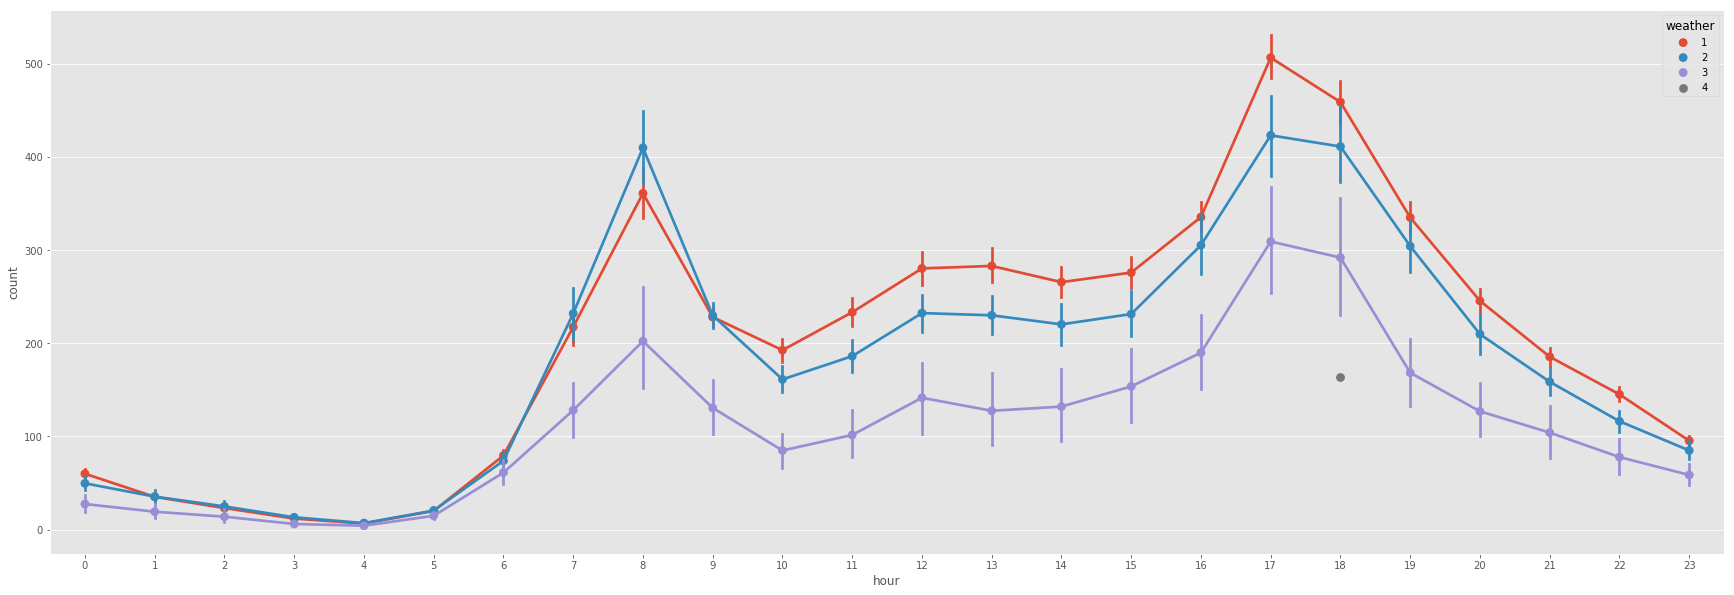

In [29]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='hour', y='count', hue='weather')

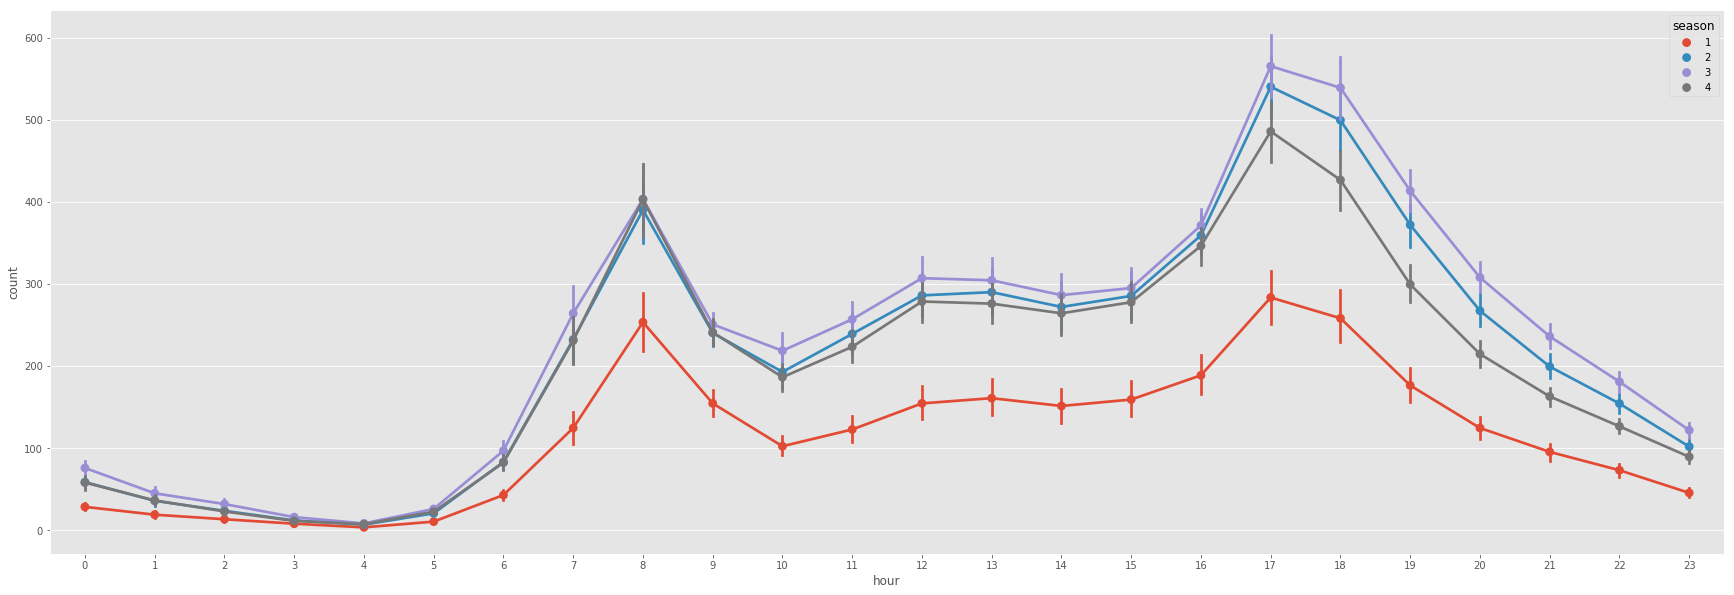

In [30]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='hour', y='count', hue='season')

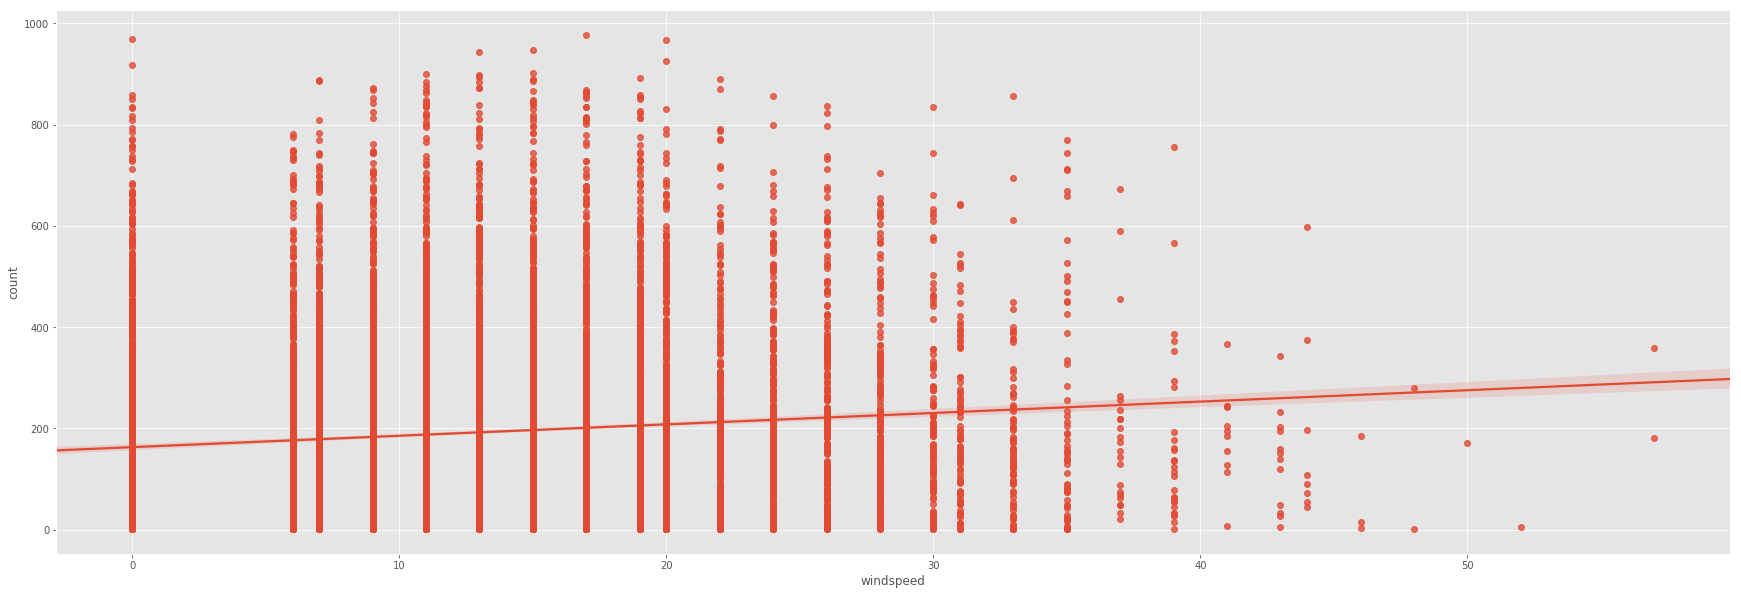

In [31]:
plt.figure(figsize=(30,10))

sns.regplot(data=train, x='windspeed', y='count')

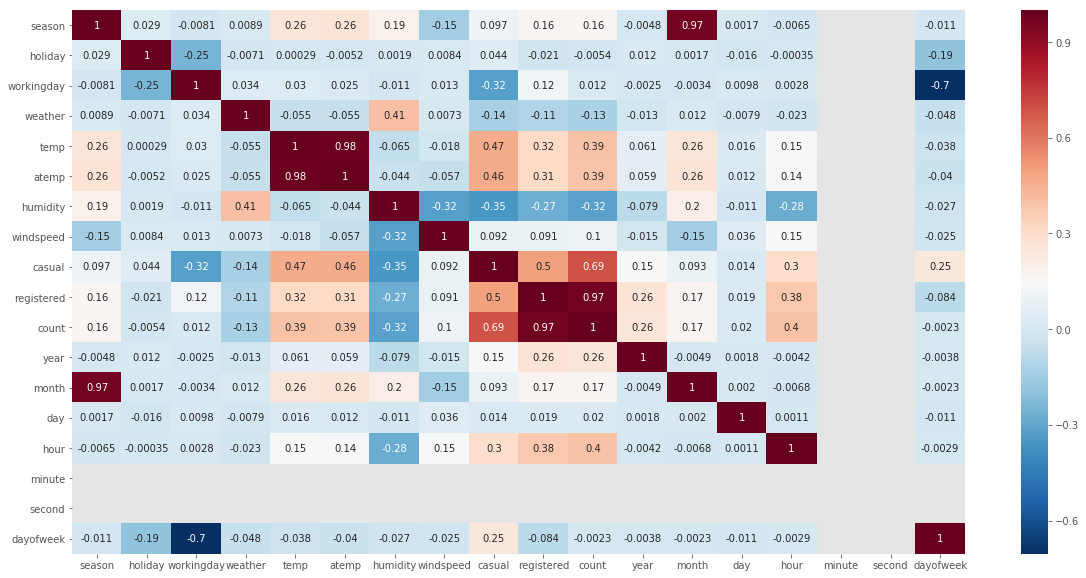

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

sns.heatmap(train.corr(), annot=True, cmap="RdBu_r")

In [33]:
q1 = np.percentile(train['count'], 25)
q3 = np.percentile(train['count'], 75)
IQR = q3 - q1
IQR

242.0

In [34]:
trainWithoutOutliers = train[(train['count'] >= q1-(1.5*IQR)) & (train['count'] <=(q3+1.5*IQR))]
print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 19)
(10586, 19)


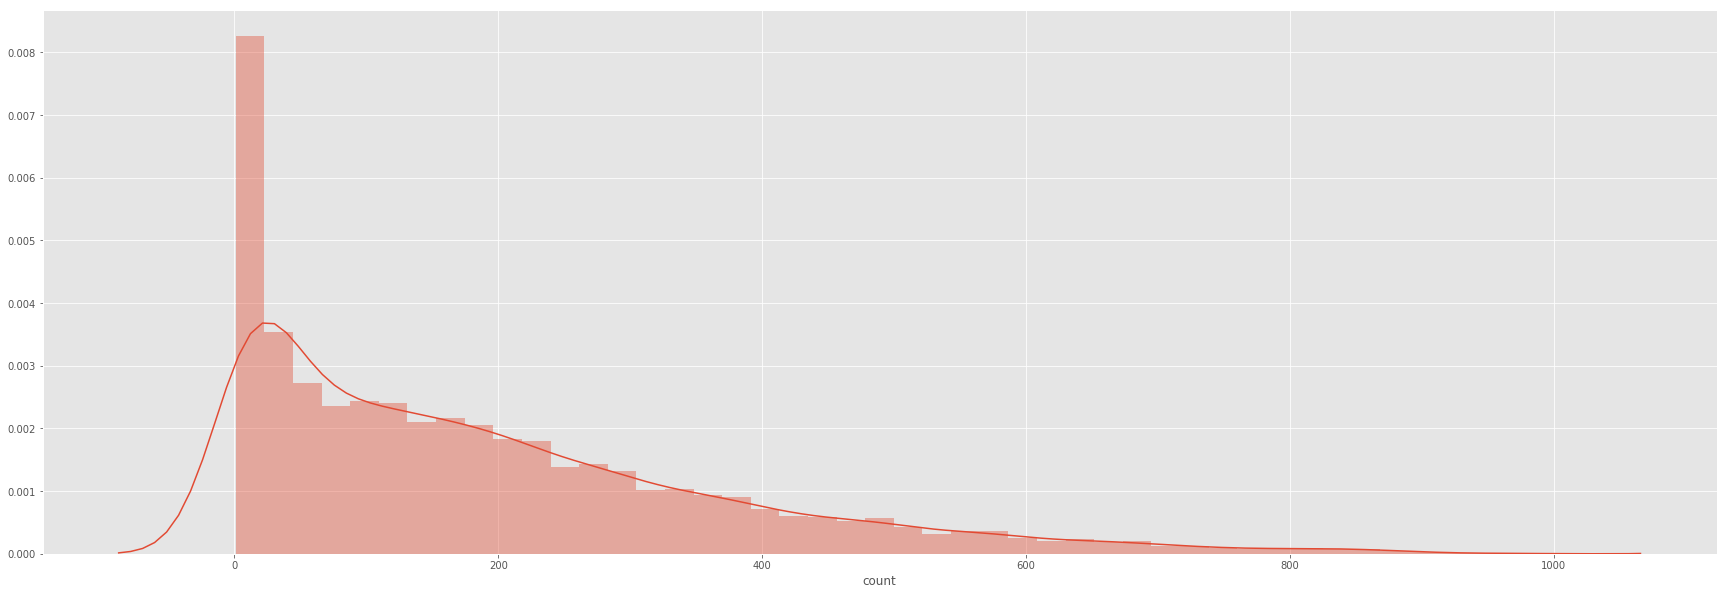

In [35]:
plt.figure(figsize=(30,10))
sns.distplot(train['count'])

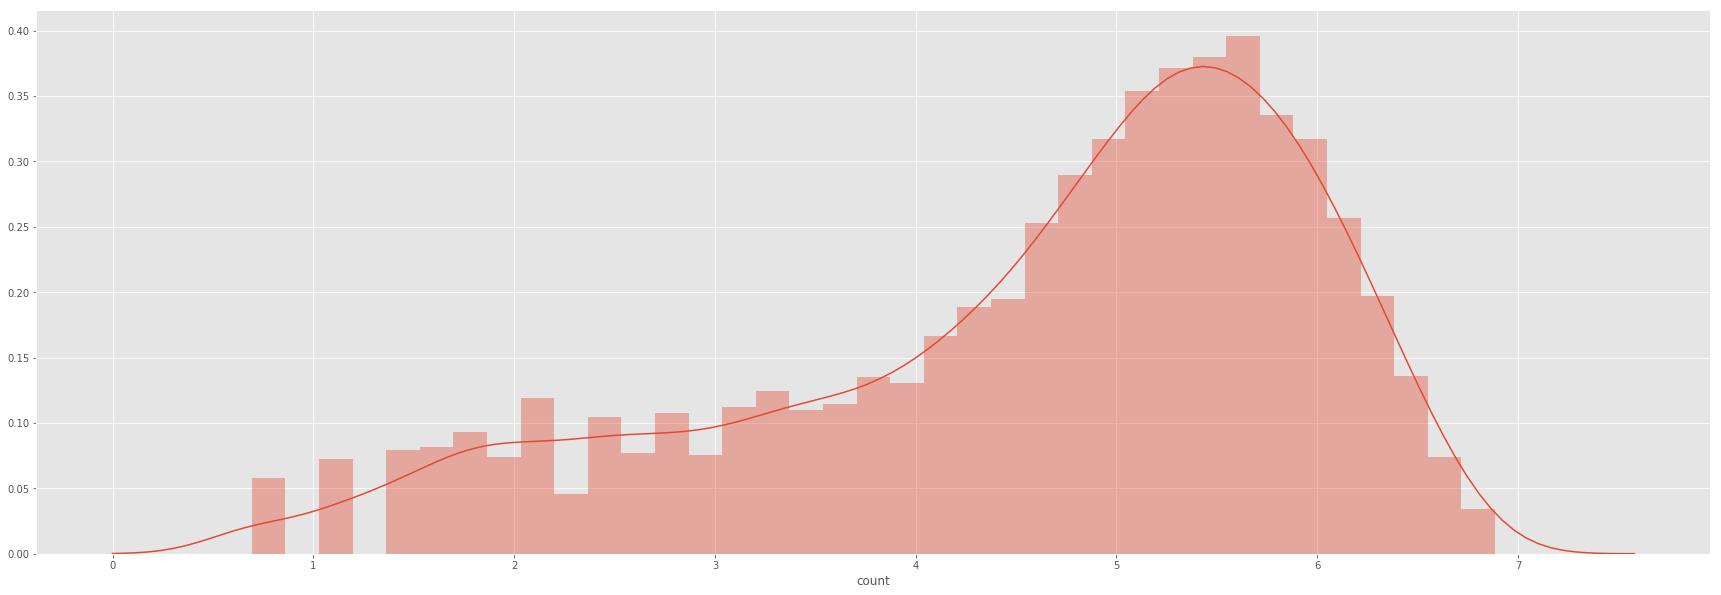

In [36]:
train['count'] = 

plt.figure(figsize=(30,10))
sns.distplot(train['count'])

In [37]:
y = train['count']
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [38]:
X = train
X.pop('count')
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0,0,5


In [39]:
X.pop('datetime')

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
5       2011-01-01 05:00:00
6       2011-01-01 06:00:00
7       2011-01-01 07:00:00
8       2011-01-01 08:00:00
9       2011-01-01 09:00:00
10      2011-01-01 10:00:00
11      2011-01-01 11:00:00
12      2011-01-01 12:00:00
13      2011-01-01 13:00:00
14      2011-01-01 14:00:00
15      2011-01-01 15:00:00
16      2011-01-01 16:00:00
17      2011-01-01 17:00:00
18      2011-01-01 18:00:00
19      2011-01-01 19:00:00
20      2011-01-01 20:00:00
21      2011-01-01 21:00:00
22      2011-01-01 22:00:00
23      2011-01-01 23:00:00
24      2011-01-02 00:00:00
25      2011-01-02 01:00:00
26      2011-01-02 02:00:00
27      2011-01-02 03:00:00
28      2011-01-02 04:00:00
29      2011-01-02 06:00:00
                ...        
10856   2012-12-18 18:00:00
10857   2012-12-18 19:00:00
10858   2012-12-18 20:00:00
10859   2012-12-18 21:00:00
10860   2012-12-18 2

In [52]:
X.pop('casual')
X.pop('registered')
X.pop('day')
X.pop('minute')
X.pop('second')

KeyError: 'registered'

In [61]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,4,5


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression

IModel = LinearRegression()
IModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
pred=IModel.predict(X_train)

In [56]:
IModel.score(X_train, y_train)

0.4872067813818226

In [57]:
from sklearn.metrics import mean_squared_error
print('MSE: ', mean_squared_error(pred, y_train))

MSE:  1.0331444013403803


In [58]:
pred=IModel.predict(X_test)
print('MSE: ', mean_squared_error(pred, y_test))

MSE:  1.0290527680070347


In [59]:
IModel.score(X_test, y_test)

0.4884277185713766

In [60]:
np.sqrt(mean_squared_error(pred, y_test))

1.0144223814600282